# 商品库存数据分析与挖掘

## 背景

### 分析与挖掘商品数据，充分了解数据

## 导入工具

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Data_Mine import apriori,kmeans,decision_tree

## 导入数据

In [4]:
data=pd.read_csv('example.csv')

In [5]:
data

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,开发区分店,杯子,阿塞拜疆,2020,4,20,工具,5,99,39,57,高,高,高,是
1,天山区分店,咖啡,尼日尔,2020,4,15,食品,17,39,23,49,低,低,高,否
2,开发区分店,口罩,以色列,2019,5,5,其它,16,2,42,57,低,高,高,否
3,天山区分店,巧克力,马提尼克,2019,1,2,食品,25,84,45,56,高,高,高,是
4,米东区,消毒水,波多黎各,2020,10,23,其它,11,44,45,51,低,高,高,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,新市区分店,牛奶,圭亚那,2020,11,24,食品,5,33,32,48,低,低,低,否
218,米东区,扫把,加蓬,2019,5,7,工具,16,6,39,53,低,高,高,否
219,开发区分店,钳子,蒙古,2020,8,16,工具,15,65,45,52,高,高,高,是
220,水磨沟区分店,啤酒,瓦里斯和富士那群岛,2019,5,8,食品,16,19,26,47,低,低,低,否


## 数据预处理

In [7]:
data.drop_duplicates(inplace=True) 

In [9]:
# 数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       222 non-null    object
 1   B       222 non-null    object
 2   C       222 non-null    object
 3   D       222 non-null    int64 
 4   E       222 non-null    int64 
 5   F       222 non-null    int64 
 6   G       222 non-null    object
 7   H       222 non-null    int64 
 8   I       222 non-null    int64 
 9   J       222 non-null    int64 
 10  K       222 non-null    int64 
 11  L       222 non-null    object
 12  M       222 non-null    object
 13  N       222 non-null    object
 14  O       222 non-null    object
dtypes: int64(7), object(8)
memory usage: 27.8+ KB


In [10]:
data.describe()

,D,E,F,H,I,J,K
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,2019.477477,6.288288,14.274775,15.995495,53.954955,35.121622,48.810811
std,0.500621,3.281340,8.461849,8.818685,29.647823,7.646522,4.868429
min,2019.000000,1.000000,1.000000,1.000000,1.000000,18.000000,40.000000
25%,2019.000000,3.000000,7.000000,8.000000,31.000000,28.000000,45.000000
50%,2019.000000,6.000000,14.000000,17.000000,57.000000,37.500000,49.000000
75%,2020.000000,9.000000,22.000000,24.000000,80.000000,41.000000,53.000000
max,2020.000000,12.000000,28.000000,30.000000,100.000000,48.000000,58.000000


## 数据可视化

### 单变量数据分布分析

In [20]:
data1=data.groupby('A',as_index=False).agg(数量=('A','count'))

In [29]:
data1

,A,数量
0,天山区分店,44
1,开发区分店,39
2,新市区分店,30
3,水磨沟区分店,34
4,沙区分店,35
5,米东区,40


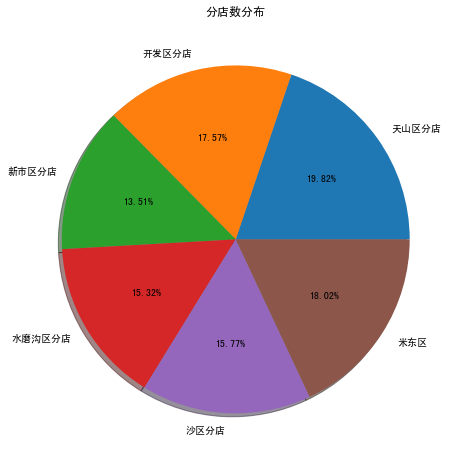

In [32]:
plt.figure(figsize=(15,8))
plt.pie(data1['数量'],labels=data1['A'],autopct='%.2f%%',shadow=True)
plt.title('分店数分布')
plt.show()

## 双变量的关联分析

In [33]:
data2=data.groupby('B',as_index=False).agg(均价=('H','mean'),最高价=('H','max'),最低价=('H','min'))

In [34]:
data2

,B,均价,最高价,最低价
0,口罩,13.125000,26,2
1,可乐,17.066667,29,3
2,咖啡,16.950000,28,2
3,啤酒,12.937500,27,1
4,巧克力,17.705882,30,6
5,扫把,17.722222,29,3
6,杯子,15.809524,29,1
7,消毒水,13.187500,28,1
8,牛奶,16.736842,30,1
9,钳子,18.130435,30,4


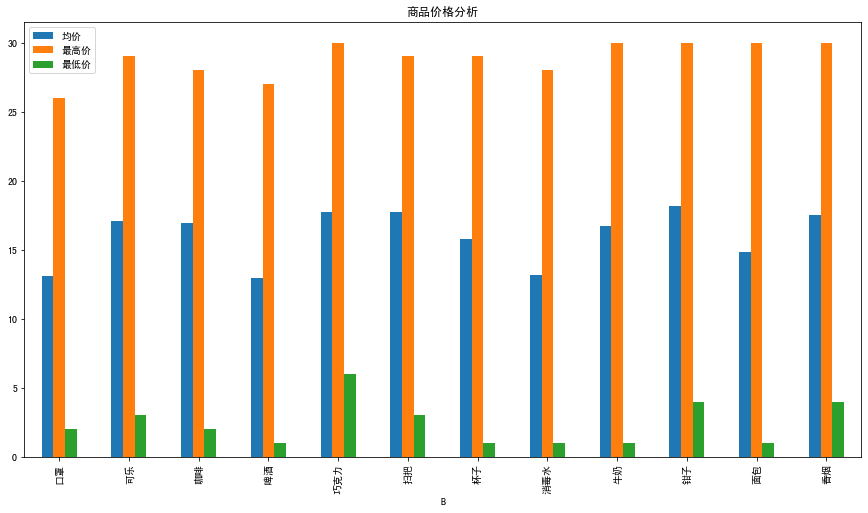

In [41]:
data2.plot(kind='bar',x='B',figsize=(15,8))
plt.title('商品价格分析')
plt.show()

## 数据挖掘

In [42]:
data

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,开发区分店,杯子,阿塞拜疆,2020,4,20,工具,5,99,39,57,高,高,高,是
1,天山区分店,咖啡,尼日尔,2020,4,15,食品,17,39,23,49,低,低,高,否
2,开发区分店,口罩,以色列,2019,5,5,其它,16,2,42,57,低,高,高,否
3,天山区分店,巧克力,马提尼克,2019,1,2,食品,25,84,45,56,高,高,高,是
4,米东区,消毒水,波多黎各,2020,10,23,其它,11,44,45,51,低,高,高,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,新市区分店,牛奶,圭亚那,2020,11,24,食品,5,33,32,48,低,低,低,否
218,米东区,扫把,加蓬,2019,5,7,工具,16,6,39,53,低,高,高,否
219,开发区分店,钳子,蒙古,2020,8,16,工具,15,65,45,52,高,高,高,是
220,水磨沟区分店,啤酒,瓦里斯和富士那群岛,2019,5,8,食品,16,19,26,47,低,低,低,否


### 关联规则分析

In [49]:
d1=data[data['E']==4]['A']
d2=data[data['E']==4]['B']

In [50]:
d1,d2

(0       开发区分店
 1       天山区分店
 7       新市区分店
 15       沙区分店
 21       沙区分店
 42       沙区分店
 45        米东区
 46      开发区分店
 90     水磨沟区分店
 123       米东区
 135     开发区分店
 145     天山区分店
 160       米东区
 164     开发区分店
 168      沙区分店
 176    水磨沟区分店
 178     开发区分店
 183      沙区分店
 199     开发区分店
 221     开发区分店
 Name: A, dtype: object,
 0       杯子
 1       咖啡
 7       面包
 15      香烟
 21      钳子
 42      扫把
 45      香烟
 46      咖啡
 90      咖啡
 123     啤酒
 135     扫把
 145     口罩
 160    巧克力
 164     面包
 168     牛奶
 176     钳子
 178     咖啡
 183     口罩
 199     杯子
 221     啤酒
 Name: B, dtype: object)

In [48]:
apriori(d1,d2,SUPmin=0.2,CONFmin=0.2)

米东区 ['消毒水', '口罩', '消毒水', '啤酒', '消毒水']
天山区分店 ['口罩', '咖啡', '钳子', '消毒水', '口罩']
沙区分店 ['面包', '杯子', '牛奶', '消毒水']
水磨沟区分店 ['牛奶', '牛奶', '巧克力']
新市区分店 ['扫把', '啤酒']
开发区分店 ['咖啡', '面包']

 ******************** 候选子项集 ******************** 

{'面包', '牛奶'} 支持度: 0.17
{'面包', '消毒水', '牛奶'} 支持度: 0.17
{'杯子', '面包', '消毒水', '牛奶'} 支持度: 0.17
{'面包', '杯子'} 支持度: 0.17
{'钳子', '消毒水', '咖啡'} 支持度: 0.17
{'面包'} 支持度: 0.33
{'钳子', '咖啡'} 支持度: 0.17
{'口罩', '啤酒'} 支持度: 0.17
{'杯子', '消毒水'} 支持度: 0.17
{'巧克力'} 支持度: 0.17
{'口罩', '钳子', '咖啡'} 支持度: 0.17
{'口罩', '消毒水', '啤酒'} 支持度: 0.17
{'面包', '杯子', '牛奶'} 支持度: 0.17
{'面包', '咖啡'} 支持度: 0.17
{'口罩'} 支持度: 0.33
{'口罩', '咖啡'} 支持度: 0.17
{'消毒水', '咖啡'} 支持度: 0.17
{'杯子', '牛奶'} 支持度: 0.17
{'钳子'} 支持度: 0.17
{'啤酒'} 支持度: 0.33
{'杯子', '消毒水', '牛奶'} 支持度: 0.17
{'钳子', '消毒水'} 支持度: 0.17
{'口罩', '消毒水'} 支持度: 0.33
{'口罩', '消毒水', '咖啡'} 支持度: 0.17
{'钳子', '口罩', '消毒水'} 支持度: 0.17
{'牛奶'} 支持度: 0.33
{'杯子'} 支持度: 0.17
{'消毒水', '啤酒'} 支持度: 0.17
{'钳子', '口罩', '消毒水', '咖啡'} 支持度: 0.17
{'杯子', '面包', '消毒水'} 支持度: 0.17
{'扫把', '啤酒'} 支持度: 0.17
{'咖啡'} 支持度: 

## 聚类分析

In [54]:
d1=data[data['A']=='天山区分店']['J']
d2=data[data['A']=='天山区分店']['K']

****************************** 第1次迭代 ******************************
第一步


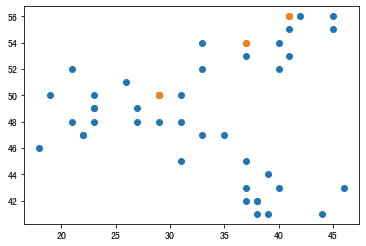

第二步
dist( [23, 49] , [29, 50] )= 6.082762530298219
dist( [23, 49] , [41, 56] )= 19.313207915827967
dist( [23, 49] , [37, 54] )= 14.866068747318506
dist( [45, 56] , [29, 50] )= 17.08800749063506
dist( [45, 56] , [41, 56] )= 4.0
dist( [45, 56] , [37, 54] )= 8.246211251235321
dist( [38, 41] , [29, 50] )= 12.727922061357855
dist( [38, 41] , [41, 56] )= 15.297058540778355
dist( [38, 41] , [37, 54] )= 13.038404810405298
dist( [42, 56] , [29, 50] )= 14.317821063276353
dist( [42, 56] , [41, 56] )= 1.0
dist( [42, 56] , [37, 54] )= 5.385164807134504
dist( [23, 49] , [29, 50] )= 6.082762530298219
dist( [23, 49] , [41, 56] )= 19.313207915827967
dist( [23, 49] , [37, 54] )= 14.866068747318506
dist( [26, 51] , [29, 50] )= 3.1622776601683795
dist( [26, 51] , [41, 56] )= 15.811388300841896
dist( [26, 51] , [37, 54] )= 11.40175425099138
dist( [33, 47] , [29, 50] )= 5.0
dist( [33, 47] , [41, 56] )= 12.041594578792296
dist( [33, 47] , [37, 54] )= 8.06225774829855
dist( [41, 53] , [29, 50] )= 12.369316876

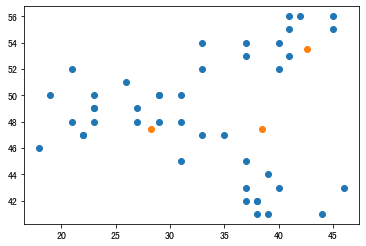

第二步
dist( [23, 49] , [28.296296296296298, 47.44444444444444] )= 5.520009741348437
dist( [23, 49] , [38.44444444444444, 47.44444444444444] )= 15.522584104586148
dist( [23, 49] , [42.625, 53.5] )= 20.13431461460757
dist( [45, 56] , [28.296296296296298, 47.44444444444444] )= 18.76729198060611
dist( [45, 56] , [38.44444444444444, 47.44444444444444] )= 10.778350500246914
dist( [45, 56] , [42.625, 53.5] )= 3.4482785560334306
dist( [38, 41] , [28.296296296296298, 47.44444444444444] )= 11.648722237516171
dist( [38, 41] , [38.44444444444444, 47.44444444444444] )= 6.4597519349993915
dist( [38, 41] , [42.625, 53.5] )= 13.3281891118036
dist( [42, 56] , [28.296296296296298, 47.44444444444444] )= 16.15515478301276
dist( [42, 56] , [38.44444444444444, 47.44444444444444] )= 9.264961207303545
dist( [42, 56] , [42.625, 53.5] )= 2.576941016011038
dist( [23, 49] , [28.296296296296298, 47.44444444444444] )= 5.520009741348437
dist( [23, 49] , [38.44444444444444, 47.44444444444444] )= 15.522584104586148
dist

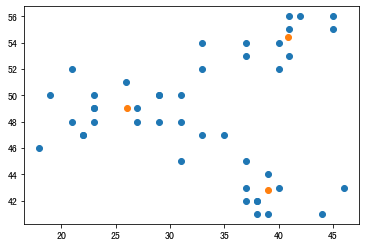

第二步
dist( [23, 49] , [26.09090909090909, 49.0] )= 3.09090909090909
dist( [23, 49] , [39.0, 42.833333333333336] )= 17.147238196799442
dist( [23, 49] , [40.9, 54.4] )= 18.696791168540123
dist( [45, 56] , [26.09090909090909, 49.0] )= 20.163177304389915
dist( [45, 56] , [39.0, 42.833333333333336] )= 14.469316193625428
dist( [45, 56] , [40.9, 54.4] )= 4.40113621693308
dist( [38, 41] , [26.09090909090909, 49.0] )= 14.346652790145573
dist( [38, 41] , [39.0, 42.833333333333336] )= 2.08832734769028
dist( [38, 41] , [40.9, 54.4] )= 13.710215169719255
dist( [42, 56] , [26.09090909090909, 49.0] )= 17.38100036113339
dist( [42, 56] , [39.0, 42.833333333333336] )= 13.504114599303097
dist( [42, 56] , [40.9, 54.4] )= 1.9416487838947618
dist( [23, 49] , [26.09090909090909, 49.0] )= 3.09090909090909
dist( [23, 49] , [39.0, 42.833333333333336] )= 17.147238196799442
dist( [23, 49] , [40.9, 54.4] )= 18.696791168540123
dist( [26, 51] , [26.09090909090909, 49.0] )= 2.002065049595022
dist( [26, 51] , [39.0, 42

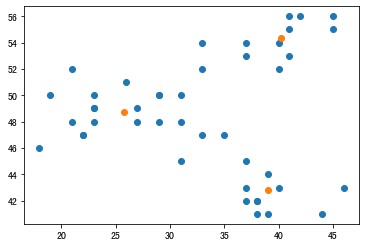

第二步
dist( [23, 49] , [25.761904761904763, 48.76190476190476] )= 2.7721484910148364
dist( [23, 49] , [39.0, 42.833333333333336] )= 17.147238196799442
dist( [23, 49] , [40.18181818181818, 54.36363636363637] )= 17.999540857321335
dist( [45, 56] , [25.761904761904763, 48.76190476190476] )= 20.55466689260032
dist( [45, 56] , [39.0, 42.833333333333336] )= 14.469316193625428
dist( [45, 56] , [40.18181818181818, 54.36363636363637] )= 5.088473443329648
dist( [38, 41] , [25.761904761904763, 48.76190476190476] )= 14.492002642477303
dist( [38, 41] , [39.0, 42.833333333333336] )= 2.08832734769028
dist( [38, 41] , [40.18181818181818, 54.36363636363637] )= 13.540572640697905
dist( [42, 56] , [25.761904761904763, 48.76190476190476] )= 17.778238372718153
dist( [42, 56] , [39.0, 42.833333333333336] )= 13.504114599303097
dist( [42, 56] , [40.18181818181818, 54.36363636363637] )= 2.4461134631043104
dist( [23, 49] , [25.761904761904763, 48.76190476190476] )= 2.7721484910148364
dist( [23, 49] , [39.0, 42.83

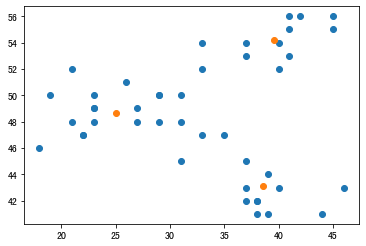

第二步
dist( [23, 49] , [25.0, 48.68421052631579] )= 2.0247772696496154
dist( [23, 49] , [38.53846153846154, 43.15384615384615] )= 16.60184633633103
dist( [23, 49] , [39.583333333333336, 54.166666666666664] )= 17.369553502864974
dist( [45, 56] , [25.0, 48.68421052631579] )= 21.29602722629901
dist( [45, 56] , [38.53846153846154, 43.15384615384615] )= 14.379678297131479
dist( [45, 56] , [39.583333333333336, 54.166666666666664] )= 5.7185128214325855
dist( [38, 41] , [25.0, 48.68421052631579] )= 15.101228142530076
dist( [38, 41] , [38.53846153846154, 43.15384615384615] )= 2.2201337984095093
dist( [38, 41] , [39.583333333333336, 54.166666666666664] )= 13.261525385699622
dist( [42, 56] , [25.0, 48.68421052631579] )= 18.507316813176043
dist( [42, 56] , [38.53846153846154, 43.15384615384615] )= 13.304357074273199
dist( [42, 56] , [39.583333333333336, 54.166666666666664] )= 3.033379120533549
dist( [23, 49] , [25.0, 48.68421052631579] )= 2.0247772696496154
dist( [23, 49] , [38.53846153846154, 43.15

In [55]:
kmeans(d1,d2,k=3)

In [57]:
data

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,开发区分店,杯子,阿塞拜疆,2020,4,20,工具,5,99,39,57,高,高,高,是
1,天山区分店,咖啡,尼日尔,2020,4,15,食品,17,39,23,49,低,低,高,否
2,开发区分店,口罩,以色列,2019,5,5,其它,16,2,42,57,低,高,高,否
3,天山区分店,巧克力,马提尼克,2019,1,2,食品,25,84,45,56,高,高,高,是
4,米东区,消毒水,波多黎各,2020,10,23,其它,11,44,45,51,低,高,高,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,新市区分店,牛奶,圭亚那,2020,11,24,食品,5,33,32,48,低,低,低,否
218,米东区,扫把,加蓬,2019,5,7,工具,16,6,39,53,低,高,高,否
219,开发区分店,钳子,蒙古,2020,8,16,工具,15,65,45,52,高,高,高,是
220,水磨沟区分店,啤酒,瓦里斯和富士那群岛,2019,5,8,食品,16,19,26,47,低,低,低,否


## 分类：决策树

In [58]:
decision_tree(data,['L','M','N'],'O')

L_纯度 0.23 {'高': 0.33, '低': 0.11} {'高': [['否', 0.04], ['是', 0.63]], '低': [['否', 0.88], ['是', 0.0]]}
M_纯度 0.47 {'高': 0.49, '低': 0.43} {'高': [['否', 0.19], ['是', 0.32]], '低': [['否', 0.46], ['是', 0.1]]}
N_纯度 0.49 {'高': 0.49, '低': 0.5} {'高': [['否', 0.33], ['是', 0.18]], '低': [['否', 0.25], ['是', 0.25]]}
Node L
M_纯度 0.23 {'高': 0.03, '低': 0.5} {'高': [['是', 0.97], ['否', 0.0]], '低': [['是', 0.3], ['否', 0.21]]}
N_纯度 0.33 {'低': 0.33, '高': 0.32} {'低': [['是', 0.63], ['否', 0.04]], '高': [['是', 0.63], ['否', 0.04]]}
Node M
N_纯度 0.49 {'低': 0.48, '高': 0.5} {'低': [['是', 0.35], ['否', 0.17]], '高': [['是', 0.23], ['否', 0.27]]}
Node N


In [ ]:
word文档报告，ppt，{代码(ipynb+截图)，推导截图文件}